# Análisis Temporal

**¿Qué relación existe entre un sistema y su modelo?**

Para tener el notebook interactivo debemos 

1. Instalar el siguiente paquete 
```
pip install ipywidgets
```
2. Activar la siguiente extension 
```
jupyter nbextension enable --py widgetsnbextension
```
    
Para trabajar con la libreria de control debemos

1. Instalar slycot 
```
pip install slycot
```
2. Luego, instalar python-control 
```
pip install control
```

In [1]:
## Incluir libreria

import ipywidgets as widgets
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np

from control import *

## Configuración 

%matplotlib inline

# Análisis Temporal 

Recordemos que el modelo representa el sistema, por lo que un análisis temporral del modelo, nos dará muchas ideas de cómo se comporta el sistema.

Clásicamente la respuesta temporal se encontraba solucionando la ecuación diferencial, siguiendo estos pasos. 

1. Determinar la ecuación diferencial. 
2. Aplicar transformada de _Laplace_.
3. Remplazar la entrada de la ecuación. 
4. Despejar la salida en función de la entrada. 
5. Descomponer en fracciones simples y aplicar la transformada inversa de Laplace. 

# Análisis Temporal

Este análisis nos permite entender el comportamiento dinámico de los sistemas a traves de simulaciones de sus modelos matemáticos. Esto modelos idealmente deben ser representados como una función de transferencia. 

## Representación de los sistemas

Los sistemas pueden ser representados de diferentes forma, dependiendo de la dimension donde se representen, en la siguiente tabla se presentan las represtaciones más comunes. 

|en el tiempo $(t)$|en el dominio de _Laplace_ $(s)$|
|:----------------:|:------------------------------:|
|ecuación diferencial | transformada de _Laplace_ |
|respuesta en función del tiempo | función de transferencia |
| | forma estándar |

Para entender el funcionamiento de los parametros de los modelos estándar analicemos dos sistemas: 

| Orden | Sistema |
|:-----:|:--------|
|1      | Tanque con salida atmosferica                   |
|2      | Masa-resorte-amortiguador con entrada en fuerza |

## Respuesta temporal de un tanque

Empecemos analizando el tanque, el cual posee la siguiente ecuacion diferencial lineazada:

$$A \frac{dh(t)}{dt} = q(t) - \frac{h(t)}{R}$$

donde $A$ es el area del tanque y $R$ es la resistencia hidraúlica de la salida del tanque. A esta ecuación le aplicamos transformada de _Laplace_ y obtenemos:

$$ As\,H(s) = Q(s)-\frac{H(s)}{R}$$

De aquí podemos encontrar la función de transferencia del sistema:

$$\frac{H(s)}{Q(s)} = \frac{R}{AR\,s+1}$$

### Simulación de la función de transferencia

Modifiquemos los valoes de $A$ y $R$ para comprender cuales son los efectos de cada parámetros en la respuesta temporal del tanque.

In [2]:
## Parametros del modelo

A = widgets.FloatSlider(value=1,min=0.1,max=10,step=0.1,description='A')
R = widgets.FloatSlider(value=1,min=0.1,max=10,step=0.1,description='R')

## Definicion de la simulacion

def simulacion_tanque(A,R):
    tanque = tf([R],[R*A,1])
    tiempo, amplitud = step_response(tanque)
    plt.plot(tiempo,amplitud)
    plt.title('Simulación Tanque')
    plt.xlabel('tiempo (t)')
    plt.ylabel('amplitud')

plot_tanque = widgets.interactive_output(simulacion_tanque,{'A':A,'R':R})      

widgets.HBox([widgets.VBox([A, R]),plot_tanque])

### Análisis de la respuesta temporal del tanque

**¿Qué podemos concluir de los dos parámetros usados en el modelo del tanque?**

- ¿Cómo afecta el area del tanque $A$ a la amplitud de la respuesta, o al tiempo de respuesta?
- ¿Cómo afecta la resistencia hidraúlica $R$ a la amplitud de la respuesta, o al tiempo de respuesta?

La función de transferencia del tanque es : 

$$\frac{H(s)}{Q(s)} = \frac{R}{AR\,s+1}$$

La función de transferencia estándar para un sistema de primer orden es : 

$$\frac{\text{salida}}{\text{entrada}} = \frac{\gamma}{\tau\,s+1}$$

De aquí tenemos que:
    
$$\gamma = R \qquad\text{y}\qquad \tau = AR$$

Por lo que $R$ afecta tanto la amplitud de la respuesta, representada por la ganancia $\gamma$, como tambien el tiempo de respuesta, representado por la constante de tiempo $\tau$.

## Respuesta temporal de un sistema masa-resorte-amortiguador

Para este sistema tenemos la siguiente ecuación diferencial

$$f(t) = m \frac{d^2\, x(t)}{dt^2} + c \frac{d\,x(t)}{dt} + k x(t)$$

donde $m$ es la masa, $c$ es el coefficiente de amortiguamiento y $k$ es la constante de resorte. De aquí podemos igualmente construir la función de transferencia.

$$\frac{X(s)}{F(s)}=\frac{1}{m\,s^2+c\,s+k}$$

### Simulación de la función de transferencia

Modifiquemos los valores de $m$, $c$ y $k$ para comprender cuales son los efectos de cada parámetros en la respuesta temporal del tanque.

In [3]:
## Parametros del modelo

m = widgets.FloatSlider(value=1,min=0.1,max=10,step=0.1,description='m')
c = widgets.FloatSlider(value=1,min=0.1,max=3,step=0.1,description='c')
k = widgets.FloatSlider(value=1,min=0.1,max=10,step=0.1,description='k')

## Definicion de la simulacion

def simulacion(m,c,k):
    sistema = tf([1],[m,c,k])
    tiempo, amplitud = step_response(sistema)
    plt.plot(tiempo,amplitud)
    plt.title('Simulación masa-resorte-amortiguador')
    plt.xlabel('tiempo (t)')
    plt.ylabel('amplitud')

plot_sistema = widgets.interactive_output(simulacion,{'m':m,'c':c,'k':k})      

widgets.HBox([widgets.VBox([m,c,k]),plot_sistema])

### Análisis de la respuesta temporal del sistema masa-resorte-amortiguador

**¿Qué podemos concluir de los tres parámetros usados en el modelo de la masa-resorte-amortiguador?**

Respondamos a como afecta cada parámetro el desempeño de la respuesta temporal en diferentes aspectos:

|    | masa $m$ | amortiguamiento $c$ | resorte $k$ |
|:---|:---:|:---:|:---:|
|La amplitud de la respuesta temporal ||||
|El número de oscilaciones visibles ||||
|La frequencia de las oscilaciones ||||
|El periodo de las oscilaciones ||||
|La rapidez con que desaparecen las oscilaciones ||||

## Conclusiones sobre los parámetros

Recordemos las funciones de transferencia en su forma estándar:

$$G_1(s) = \frac{\gamma}{\tau\,s+1} \qquad\text{y}\qquad G_2(s) = \frac{\gamma}{1+\frac{2\xi}{\omega_n}\,s+\frac{s^2}{\omega_n^2}}$$

- Para ambos sistemas $\gamma$, la ganacia relaciona el valor final de la salida con el valor final de la entrada. 
- La constante de tiempo $\tau$ explica cuan rápido reaciona un sistema ante un estimulo. 
- La frecuencia natural $\omega_n$ denota la frecuencia a la cual un sistema oscilaría sin considerar perdidas de energía. 
- El coeficiente de amortiguamiento $\xi$, reduce las oscilaciones del sistema. 

## Teorema del Valor Final 

La salida de un sistema se puede escribir como $y(t) = y_t(t)+y_ss$, donde:

- $y_t(t)$ es la respuesta transitoria  
- $y_ss$ es la respuesta estacionaria

La respuesta trasitoria se desvanecera transcurrido un tiempo luego: $\lim_{t\to\infty} y_t(t) = 0$

Para encontrar la respuesta estacionaria o **valor final** de un sistema podemos aplicar el siguiente teorema: 

$$y_{ss} = \lim_{t\to\infty} y(t) = \lim_{s\to 0} s\,Y(s)$$

### Ejercicio
Dada la siguiente función de transferencia y señal de entrada encontrar el valor final:

$$\frac{F(s)}{X(s)}=\frac{5}{s+3} \qquad\text{y}\qquad X(s)=\frac{3}{s}$$

**El valor final será**

$$f(\infty) = \lim_{s\to 0} s\, F(s)  = \lim_{s\to 0} s\frac{5}{s+3}\frac{3}{s}= 5$$

## Señales de Prueba 

Los sistemas responden a los estímulos de entrada, dichas señales pueden ser:

- Escalón
- Rampa
- Pulso
- Impulso

existen otras como:

- Parabolica
- Sigmoidal

### Señal escalón 

In [4]:
t = sp.Symbol('t')
A = sp.Symbol('A')

f = sp.Piecewise((A,t>=0),(0,True))
f 

Piecewise((A, t >= 0), (0, True))

In [5]:
## Parametros del modelo

param_A = widgets.FloatSlider(value=5,min=0.1,max=10,step=0.1,description='amplitud',orientation='vertical')

## Definicion de la simulacion

def simulacion_escalon(param_A):
    fs = lambda ts: f.subs(A,param_A).subs(t,ts)
    ts = np.arange(-5, 5, 0.1)
    plt.plot(ts,list(map(fs, ts)), 'b-')
    plt.ylim(0,11)
    plt.title('Señal Escalón')
    plt.xlabel('tiempo (t)')
    plt.ylabel('amplitud')

plot_escalon = widgets.interactive_output(simulacion_escalon,{'param_A':param_A})      

widgets.HBox([param_A,plot_escalon])

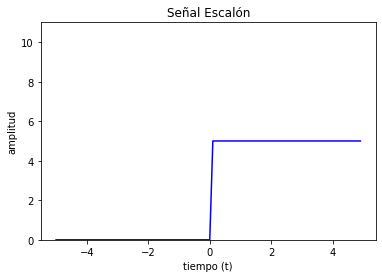

In [6]:
simulacion_escalon(5)

### Señal Rampa

In [7]:
t = sp.Symbol('t')
A = sp.Symbol('A')

f = sp.Piecewise((A*t,t>=0),(0,True))
f 

Piecewise((A*t, t >= 0), (0, True))

In [8]:
## Parametros del modelo

param_A = widgets.FloatSlider(value=6,min=0.1,max=10,step=0.1,description='Pendiente',orientation='vertical')

## Definicion de la simulacion

def simulacion_rampa(param_A):
    fs = lambda ts: f.subs(A,param_A).subs(t,ts)
    ts = np.arange(-5, 5, 0.1)
    plt.plot(ts,list(map(fs, ts)), 'b-')
    plt.ylim(0, 30)
    plt.title('Señal Rampa')
    plt.xlabel('tiempo (t)')
    plt.ylabel('amplitud')

plot_rampa = widgets.interactive_output(simulacion_rampa,{'param_A':param_A})      

widgets.HBox([param_A,plot_rampa])

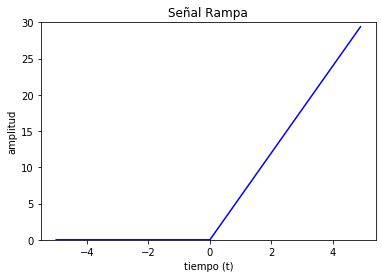

In [9]:
simulacion_rampa(6)

### Señal Pulso

In [10]:
t = sp.Symbol('t')
t0= sp.Symbol('t0')
A = sp.Symbol('A')

f = sp.Piecewise((0,t>t0),(A/t0,t>=0),(0,t<0))
f 

Piecewise((0, t > t0), (A/t0, t >= 0), (0, True))

In [11]:
## Parametros del modelo

param_A = widgets.FloatSlider(value=6,min=0.1,max=10,step=0.1,description='Area',orientation='vertical')
param_t = widgets.FloatSlider(value=0.1,min=0.1,max=1,step=0.1,description='Tiempo',orientation='vertical')

## Definicion de la simulacion

def simulacion_pulso(param_A,param_t):
    fs = lambda ts: f.subs(A,param_A).subs(t0,param_t).subs(t,ts)
    ts = np.arange(-5, 5, 0.1)
    plt.plot(ts,list(map(fs, ts)), 'b-')
    plt.ylim(0, 30)    
    plt.title('Señal Pulso')
    plt.xlabel('tiempo (t)')
    plt.ylabel('amplitud')

plot_pulso = widgets.interactive_output(simulacion_pulso,{'param_A':param_A,'param_t':param_t})      

widgets.HBox([plot_pulso,param_A,param_t])

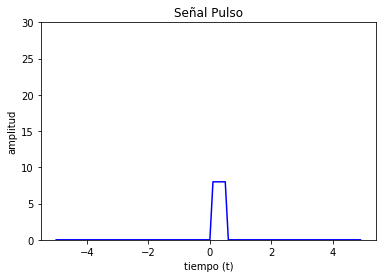

In [12]:
simulacion_pulso(4,0.5)

### Resumen de Señales de Entrada

La siguiente tabla resume las transformadas de _Laplace_ de las señales de entrada. 

||Escalón|Rampa|Impulso|_ Señal Pulso _|
|:---:|:-----:|:---:|:-----:|:---:|
|$F(s)$|$\frac{A}{s}$|$\frac{A}{s^2}$|$A$|$\frac{A}{st_0}\left(1-e^{-s\,t0}\right)$|

Para las señales unitaria se remplaza $A$ por uno $A=1$

## Calculo Teórico de la Respuesta Temporal 

Para determinar la respuesta temporal, se siguen los pasos:

1. Aplicar la entrada a la función de transferencia
   $$ Y(s) = G(s)\cdot X(s)$$
2. Simplificar si es posible
3. Usar tablas de transformada inversa de _Laplace_ para convertir desde el dominio $s$ al dominio del tiempo.

## Tiempos Característicos de la Respuesta a un Escalón 

|tiempo|$\tau$|$3\tau$|$5\tau$|$10\tau$|
|:----:|:----:|:-----:|:-----:|:------:|
|salida|$63,2\%$|$95\%$|$99\%$|$99.9\%$|

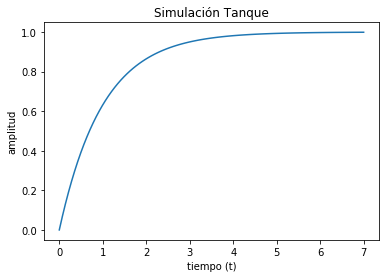

In [13]:
simulacion_tanque(1,1)

- La constante de tiempo $\tau$ define la velocidad de respuesta del sistema. Los sistemas rápidos tiene $\tau$ pequeñas.
- Cualquier sistema de primer orden alcanzará un $95\%$ de su valor final a los $3\tau$. 

## Efectos del amortiguamiento

Dependiendo de coefficiente de amortiguamiento $\xi$ tendremos 4 tipos de respuestas. 

|Respuesta|Oscilatorio|Sub Amortiguado|Amortiguado|Sobre Amortiguado|
|:-------:|:---------:|:-------------:|:---------:|:---------------:|
| $\xi$   | $=0$      | $<1$          | $=1$      | $>1$            |    

cuando un sistema tiene un $\xi=1$, se conoce también como críticamente amortiguado. 

In [14]:
## Parametros del modelo

gamma = widgets.FloatSlider(value=1,min=0.1,max=10,step=0.1,description='gamma')
xi    = widgets.FloatSlider(value=1,min=0,max=3,step=0.1,description='xi')
omega = widgets.FloatSlider(value=1,min=0.1,max=10,step=0.1,description='omega')

## Definicion de la simulacion

def simulacion(gamma,xi,omega):
    sistema = tf([gamma],[1/(omega*omega),2*xi/omega,1])
    tiempo, amplitud = step_response(sistema)
    plt.plot(tiempo,amplitud)
    plt.title('Simulación Sistema de 2do Orden')
    plt.xlabel('tiempo (t)')
    plt.ylabel('amplitud')

plot_sistema = widgets.interactive_output(simulacion,{'gamma':gamma,'xi':xi,'omega':omega})      

widgets.HBox([widgets.VBox([gamma,xi,omega]),plot_sistema])

## Criterios de Desempeño

|Nombre|Variable|Descripción|
|:-----|:-------|:----------|
|Tiempo de subida| $t_r$ | Para sistemas sub-amortiguados, es el tiempo en el que se alcanza por primera vez el valor estacionario. Para sistemas sobre-amortiguados, es el tiempo que tarda en ir de un $10\%$ a un $90\%$ del valor estacionario|
|Tiempo de pico| $t_p$ | Tiempo que tarda en llegar al primer pico|
|Valor Sobrepico|$y_{sp}$| Distancia entre el valor máximo de la respuesta y su valor estacionario|
|Tiempo de establecimiento| $t_s$ | Tiempo que tarda la respuesta para llegar a un valor estacionario y donde la oscilaciones no supera el $\pm5\%$|
|Número de oscilaciones| $n_s$ | Es el número de oscilaciones enteras que ocurren entre el inicio de la respuesta hasta el tiempo de establecimiento |

### Tiempo de Subida

Si hacemos $y(t_r)=1$ para la respuesta, después de manipulaciones obtendremos:

$$t_r = \frac{1}{\omega_d}\left(\pi-\tan^{-1}\left(\frac{\sqrt{1-\xi^2}}{\xi}\right)\right)$$

- Bajos coeficientes de amortiguamiento producen respuestas rápidas, pero incrementan oscilaciones.
- Un buen compromiso para comenzar es tener sistemas de amortiguamiento de $0.4<\xi<0.8$

### Tiempo de Pico

Por inspección, para un sistema oscilatorio, este tiempo es medio periodo de la respuesta oscilatoria, es decir:

$$t_p = \frac{1}{2}\,\frac{2\pi}{\omega_d} = \frac{\pi}{\omega_d}$$

Esto puede ser confirmado encontrando el máximo de la respuesta $y(t)$. 

### Valor Pico

Se usa el tiempo de pico $t_p$ para evaluar la respuesta temporal:

$$y_p= 1-e^{-\xi\omega_n\,t_p}\left(\frac{\xi\omega_n}{\omega_d}\sin\left(\omega_gt_p\right) + \cos\left(\omega_gt_p\right)\right)$$

El porcentaje de sobrepico, se calcula:

$$\frac{\text{valor pico}-\text{valor final}}{\text{valor final}} = \frac{y_p-y_{ss}}{y_{ss}} \times 100\%$$

## Tiempo de Establecimiento

El termino de decaimiento exponencial descibribe la envolvente de la oscilación:

$$e^{-\xi\omega_nt}$$

si igualamos este termino con el $5\%$, contraremos el tiempo de establecimiento para el $95\%$

$$-\xi\omega_nt_s = \ln(0.05) = -3$$

luego,

$$t_s(5\%) = \frac{3}{\xi\omega_n}$$

## Número de Oscilaciones

Este número antes del establecimiento se calcula

$$n_s = \frac{t_s}{\tau_d}$$

## Etapas de Diseño de Controladores

Las siguientes se sugieren como etapas para el diseño de un controlador:

- Entender el sistema a controlar.
- Modelizar el sistema.
- Analizar el modelo.
- Proponer un controlador.
- Probar el controlador en el modelo.
- Probar el controlador en el sistema físico/real.

## Sistemas en la Universidad

**Revisemos los modelos matemáticos de los sistemas encontrados**